## Mushroom Classifier

## Business Problem

A foraging supply company wants to develop a reliable tool to help amateur mushroom hunters and food suppliers distinguish between edible and poisonous mushrooms in the wild. Misidentification can lead to severe health risks or even fatalities.

Using features the company aims to build a machine learning classification model that accurately classifies the class.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
import timeit

In [2]:
df=pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [5]:
df['class'].unique()

array(['p', 'e'], dtype=object)

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

### Seperate X & Y

In [8]:
ip=df.drop('class',axis=1)
op=df['class']

In [9]:
X_1=pd.get_dummies(ip,drop_first=True,dtype=int)
y_1=pd.get_dummies(op,drop_first=True,dtype=int)

### train_test_split

In [10]:
from sklearn.model_selection import train_test_split
X=X_1
y=y_1
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

### AdaBoostClassifier

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
estimator=AdaBoostClassifier()
param_grid={'n_estimators':list(range(1,51))}

model=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
model.fit(X_train,y_train)

model.best_params_

{'n_estimators': 20}

In [12]:
model.best_estimator_.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.05, 0.05, 0.05, 0.  , 0.  ,
       0.1 , 0.05, 0.  , 0.  , 0.  , 0.05, 0.15, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.05, 0.  , 0.1 , 0.  , 0.05, 0.  , 0.  , 0.1 ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

### Important Features

In [13]:
features=(pd.DataFrame(data=(model.best_estimator_.feature_importances_),index=X.columns,columns=["ImportantFeatures"]))

imp_features=features[features['ImportantFeatures']>0].index.to_list()
imp_features

['cap-color_w',
 'bruises_t',
 'odor_c',
 'odor_f',
 'odor_n',
 'odor_p',
 'gill-spacing_w',
 'gill-size_n',
 'stalk-surface-above-ring_k',
 'stalk-surface-below-ring_y',
 'stalk-color-below-ring_n',
 'spore-print-color_r',
 'spore-print-color_w',
 'population_c',
 'population_v']

In [14]:
X=X[imp_features]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [15]:
from sklearn.ensemble import AdaBoostClassifier

start_time=timeit.default_timer()

final_model=AdaBoostClassifier(n_estimators=20)
final_model.fit(X_train,y_train)

ypred_train=final_model.predict(X_train)
ypred_test=final_model.predict(X_test)

end_time=timeit.default_timer()
training_time_1=end_time-start_time

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

train_accuracy_1=accuracy_score(y_train,ypred_train)
test_accuracy_1=accuracy_score(y_test,ypred_test)
CV_score_1=(cross_val_score(final_model,X_train,y_train,cv=5)).mean()

print(f"Train accuracy is {accuracy_score(y_train,ypred_train)}")
print(f"Test accuracy is {accuracy_score(y_test,ypred_test)}")
print(f"CV score is {(cross_val_score(final_model,X_train,y_train,cv=5)).mean()}")

Train accuracy is 1.0
Test accuracy is 1.0
CV score is 1.0


In [16]:
print(f"AdaBoostClassifier Training Time is {training_time_1:.4f} seconds")

AdaBoostClassifier Training Time is 0.1053 seconds


In [17]:
X=X_1
y=y_1

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)


### GradientBoostingClassifier

In [19]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier
estimator=GradientBoostingClassifier()
param_grid={'n_estimators':[1,5,10,20],'learning_rate':[0.1,0.2,0.3,0.5,0.8,1]}

model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model.fit(X_train,y_train)
model.best_params_

{'learning_rate': 0.8, 'n_estimators': 10}

### Important Features

In [20]:
features=(pd.DataFrame(data=(model.best_estimator_.feature_importances_),index=X.columns,columns=["ImportantFeatures"]))

imp_features=features[features['ImportantFeatures']>0].index.to_list()
imp_features

['cap-shape_c',
 'cap-surface_g',
 'cap-surface_y',
 'cap-color_y',
 'bruises_t',
 'odor_c',
 'odor_f',
 'odor_l',
 'odor_n',
 'odor_p',
 'gill-spacing_w',
 'gill-size_n',
 'gill-color_g',
 'gill-color_r',
 'stalk-root_c',
 'stalk-root_r',
 'stalk-surface-above-ring_k',
 'stalk-surface-above-ring_y',
 'stalk-surface-below-ring_s',
 'stalk-surface-below-ring_y',
 'stalk-color-above-ring_n',
 'stalk-color-below-ring_n',
 'stalk-color-below-ring_y',
 'ring-number_o',
 'ring-type_n',
 'spore-print-color_n',
 'spore-print-color_r',
 'spore-print-color_u',
 'population_c']

In [21]:
X=X[imp_features]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

start_time=timeit.default_timer()

final_model=GradientBoostingClassifier(n_estimators=10,learning_rate=0.8)
final_model.fit(X_train,y_train)

ypred_train=final_model.predict(X_train)
ypred_test=final_model.predict(X_test)

end_time=timeit.default_timer()
training_time_2=end_time-start_time

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

train_accuracy_2=accuracy_score(y_train,ypred_train)
test_accuracy_2=accuracy_score(y_test,ypred_test)
CV_score_2=(cross_val_score(final_model,X_train,y_train,cv=5)).mean()

print(f"Train accuracy is {accuracy_score(y_train,ypred_train)}")
print(f"Test accuracy is {accuracy_score(y_test,ypred_test)}")
print(f"CV score is {(cross_val_score(final_model,X_train,y_train,cv=5)).mean()}")

Train accuracy is 0.9996922603477458
Test accuracy is 0.9993846153846154
CV score is 1.0


In [23]:
print(f"GradientBoostingClassifier Training Time is {training_time_2:.4f} seconds")

GradientBoostingClassifier Training Time is 0.0518 seconds


In [24]:
X=X_1
y=y_1
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)


### XGBClassifier

In [25]:
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
estimator=XGBClassifier()
param_grid={'n_estimators':[10,20,40,100],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}

model=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
model.fit(X_train,y_train)
model.best_params_

{'gamma': 0, 'max_depth': 3, 'n_estimators': 40}

### Important Features

In [26]:
features=(pd.DataFrame(data=(model.best_estimator_.feature_importances_),index=X.columns,columns=["ImportantFeatures"]))

imp_features=features[features['ImportantFeatures']>0].index.to_list()
imp_features

['cap-surface_s',
 'cap-color_w',
 'cap-color_y',
 'bruises_t',
 'odor_c',
 'odor_f',
 'odor_l',
 'odor_m',
 'odor_n',
 'odor_p',
 'gill-spacing_w',
 'gill-size_n',
 'stalk-shape_t',
 'stalk-root_b',
 'stalk-root_c',
 'stalk-root_r',
 'stalk-surface-above-ring_k',
 'stalk-surface-above-ring_s',
 'stalk-surface-below-ring_s',
 'stalk-surface-below-ring_y',
 'stalk-color-below-ring_n',
 'stalk-color-below-ring_y',
 'ring-number_o',
 'ring-number_t',
 'spore-print-color_k',
 'spore-print-color_n',
 'spore-print-color_r',
 'spore-print-color_u',
 'spore-print-color_w',
 'population_c',
 'population_v',
 'population_y',
 'habitat_g']

In [27]:
X=X[imp_features]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

In [28]:
from xgboost import XGBClassifier

start_time=timeit.default_timer()

final_model=XGBClassifier(n_estimators=40,max_depth=3,gamma=0)
final_model.fit(X_train,y_train)

ypred_train=final_model.predict(X_train)
ypred_test=final_model.predict(X_test)

end_time=timeit.default_timer()
training_time_3=end_time-start_time

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

train_accuracy_3=accuracy_score(y_train,ypred_train)
test_accuracy_3=accuracy_score(y_test,ypred_test)
CV_score_3=(cross_val_score(final_model,X_train,y_train,cv=5)).mean()

print(f"Train accuracy is {accuracy_score(y_train,ypred_train)}")
print(f"Test accuracy is {accuracy_score(y_test,ypred_test)}")
print(f"CV score is {(cross_val_score(final_model,X_train,y_train,cv=5)).mean()}")

Train accuracy is 1.0
Test accuracy is 1.0
CV score is 1.0


In [29]:
print(f"XGBClassifier Training Time is {training_time_3:.4f} seconds")

XGBClassifier Training Time is 0.0806 seconds


In [30]:
best_model=pd.DataFrame({"AdaBoostClassifier":[train_accuracy_1,test_accuracy_1,CV_score_1,training_time_1],
                        "GradientBoostingClassifier":[train_accuracy_2,test_accuracy_2,CV_score_2,training_time_2],
                        "XGBClassifier":[train_accuracy_3,test_accuracy_3,CV_score_3,training_time_3]},
                        index=['Training accuracy','Testing accuracy','CV score','Training Time'])
best_model

,AdaBoostClassifier,GradientBoostingClassifier,XGBClassifier
Training accuracy,1.000000,0.999692,1.000000
Testing accuracy,1.000000,0.999385,1.000000
CV score,1.000000,1.000000,1.000000
Training Time,0.105288,0.051825,0.080637


## Final Model

In [31]:
X=X_1
y=y_1
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)


In [32]:
final_model=AdaBoostClassifier(n_estimators=20)

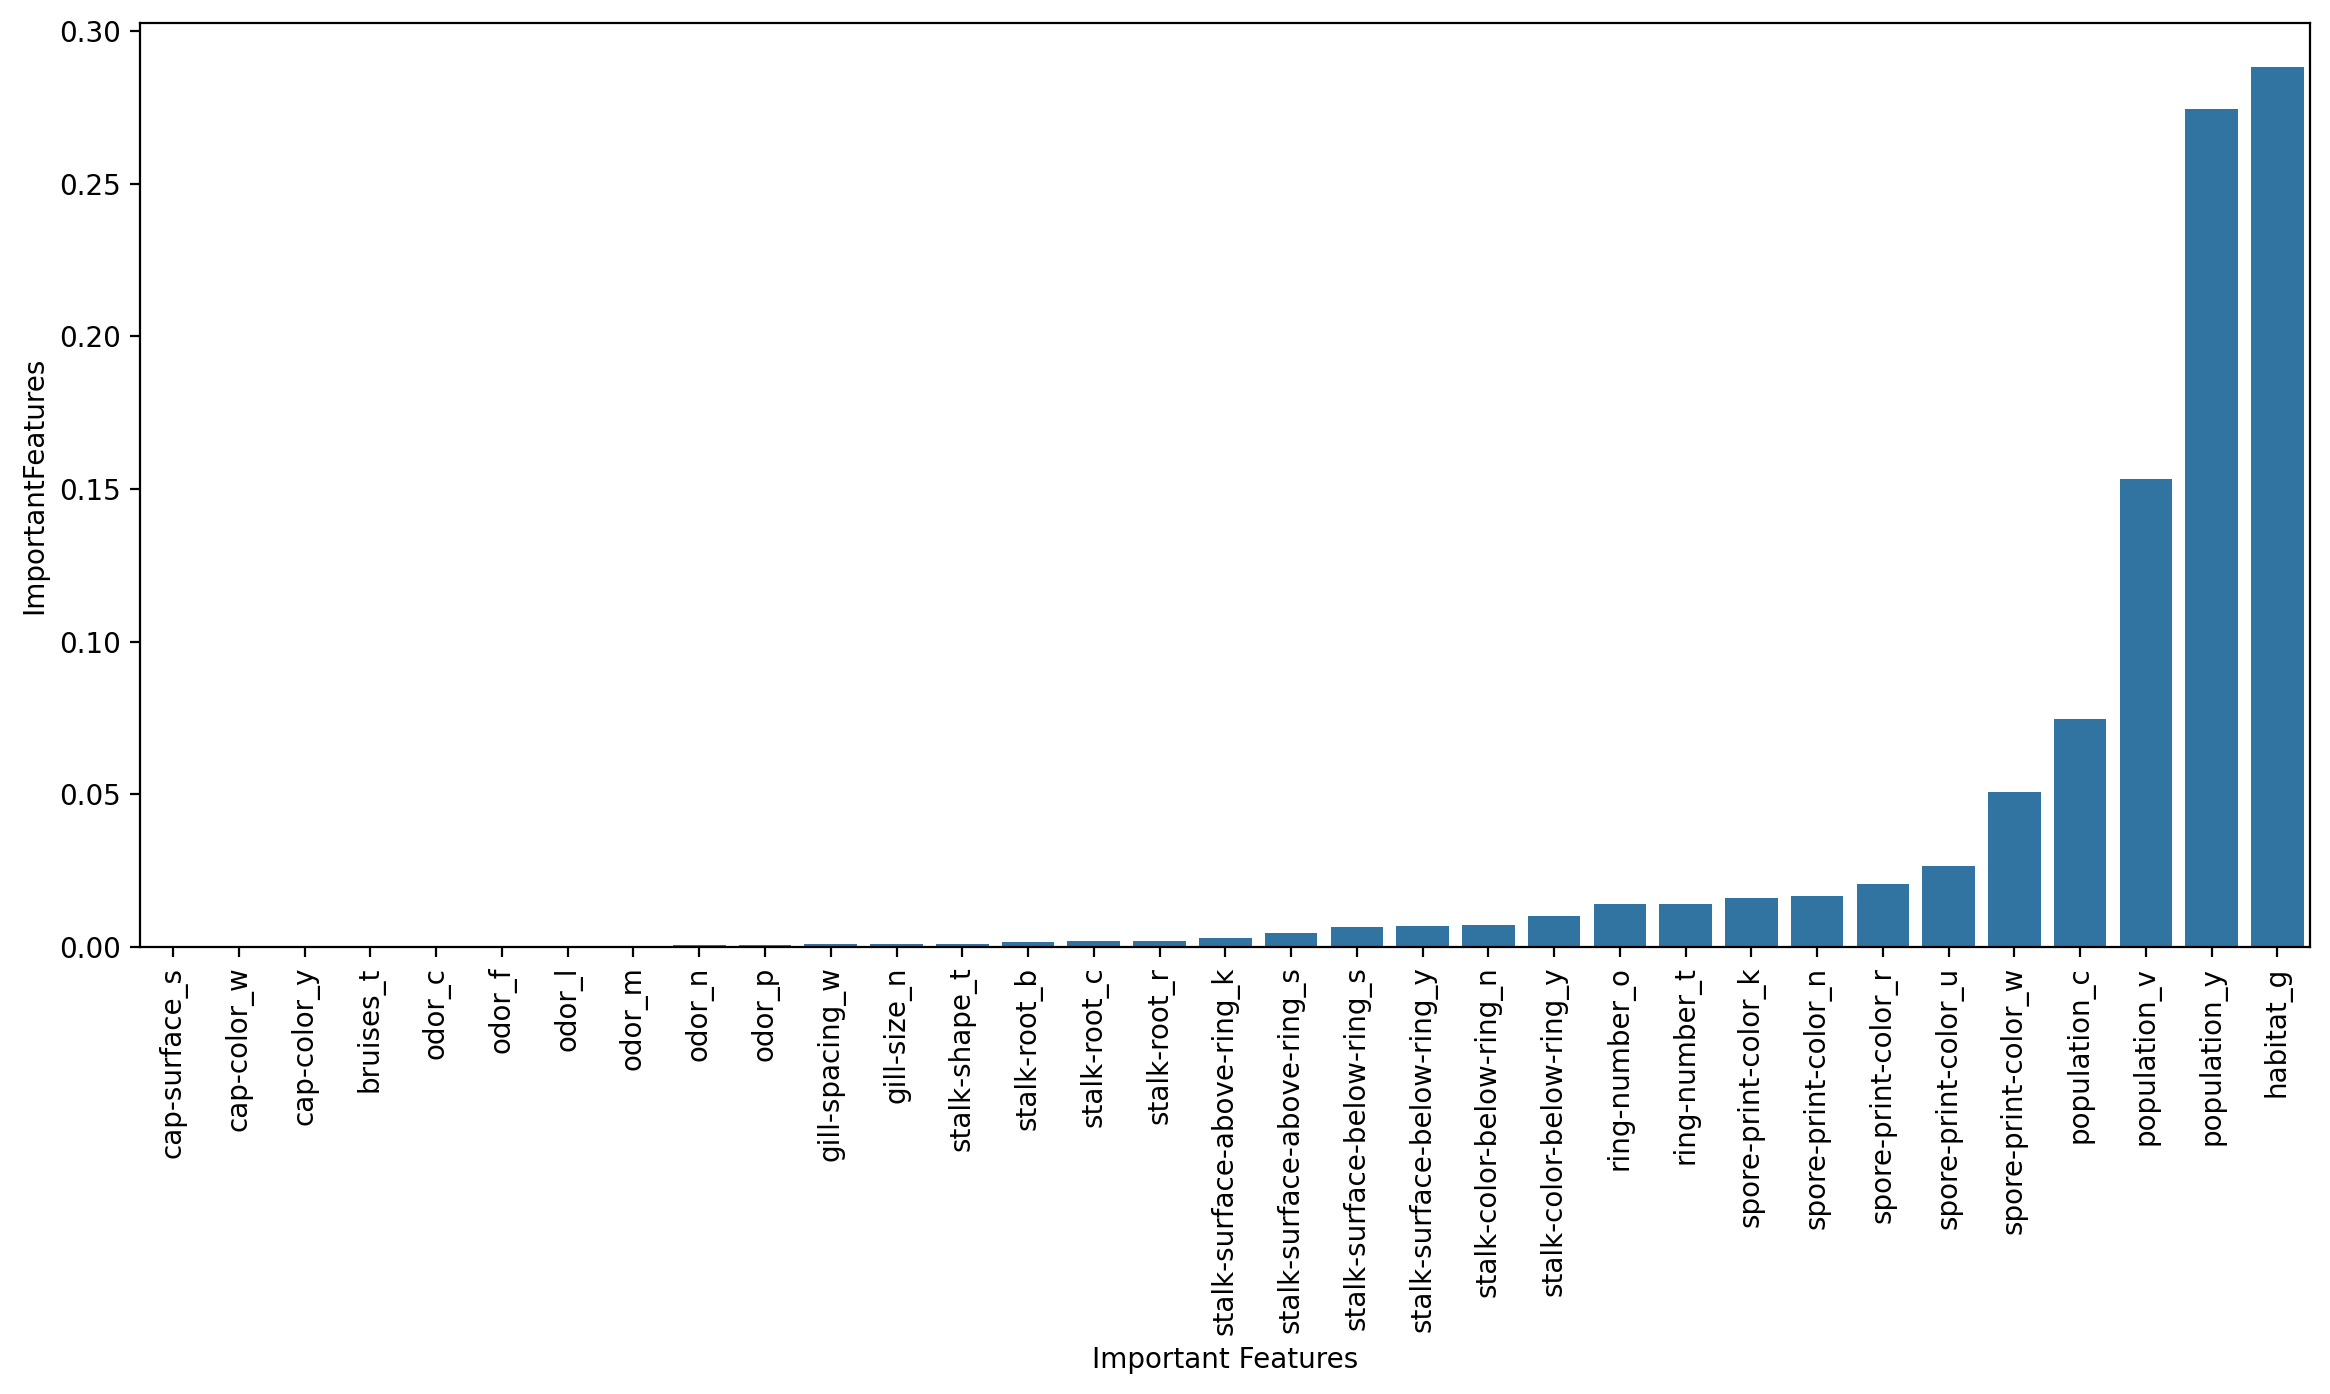

In [33]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=features[features['ImportantFeatures']>0].sort_values('ImportantFeatures'),
             x=features[features['ImportantFeatures']>0].index,
             y='ImportantFeatures')
plt.xticks(rotation=90)
plt.xlabel("Important Features")
plt.show()